<a href="https://colab.research.google.com/github/shimjide123/datman/blob/main/ps6_by_Yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# 1st project: exploring the interaction between quality of governance, people's happiness, and political unrests in the west sahel region of west africa.

## research questions:

1. how does governance affect people's happiness in west sahel region of africa?

2. Whether people's unhappiness contributes to political unrests in west sahel region of africa?

## choosen datasets:

Freqencies of local terrorist activities by country:https://www.visionofhumanity.org/public-release-data/

World Happiness index 2023: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023

Global positvie peace index: https://www.visionofhumanity.org/public-release-data/ (it contains a lot of variables about quality of governance)


## Importing the 3 datasets:


In [2]:
happiness=pd.read_excel('https://github.com/shimjide123/datman/raw/main/WHR2023(sahel).xls')

In [3]:
happiness.head() #here includes all countries, later I will reduce the obs to only the 11 countries in west sahel region

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860


In [4]:
governance=pd.read_excel('https://github.com/shimjide123/datman/raw/main/PPI-newest(sahel).xlsx')

In [5]:
governance.head() #here includes all countries, later I will reduce the obs to only the 11 countries in west sahel region

,Country,Region,PPI Overall Score,Equitable Distribution of Resources,Well-Functioning Government,Exclusion by socio-economic group,Group grievance,Access to public Services,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness
0,Benin,sub-Saharan Africa,3.258,3.453,3.020,3.192849,1.844444,3.548464,2,2.312753,3.084653,3.411097
1,Burkina Faso,sub-Saharan Africa,3.436,3.151,3.316,1.957746,2.511111,2.799141,3,4.147212,3.085141,3.696844
2,Cameroon,sub-Saharan Africa,4.005,4.106,3.844,4.679307,4.377778,4.339806,5,2.295775,3.502110,3.745061
3,Chad,sub-Saharan Africa,4.374,4.419,4.416,4.852654,4.244444,4.784816,5,3.842369,3.772593,4.424916
4,Gambia,sub-Saharan Africa,3.553,3.651,3.533,2.421452,1.844444,3.369569,4,4.807062,3.352093,3.581924


In [6]:
violence=pd.read_excel("https://github.com/shimjide123/datman/raw/main/GTI-newest(sahel).xlsx")

In [7]:
violence.head()

,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages
0,Burkina Faso,2,8.564101,310,1135,496,84
1,Mali,4,8.412392,272,944,376,24
2,Nigeria,8,8.064811,120,385,147,59
3,Niger,10,7.616207,54,198,118,16
4,Cameroon,11,7.347002,116,166,53,65


##merge: I will be using fuzzy wazzy

Below are the Fuzzy wuzz codes I will use. They are copied from PS 4 but I will change them later for the datasets

In [8]:
!pip install fuzzywuzzy
#import fuzzywuzzy
#from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [9]:
import numpy as np

In [10]:
happiness["matches"] = happiness["Country"].map(lambda x: process.extract(x,governance["Country"].to_list(),limit=3)) #skim thru to make sure it mostly makes sense
happiness

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,matches
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,"[(Benin, 100), (Niger, 40), (Sierra Leone, 40)]"
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,"[(Burkina Faso, 100), (Guinea, 60), (Mauritani..."
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,"[(Cameroon, 100), (Chad, 45), (Sierra Leone, 45)]"
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,"[(Chad, 100), (Cameroon, 45), (Guinea, 26)]"
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,"[(Gambia, 100), (Nigeria, 46), (Mali, 45)]"
5,Guinea,2022,5.317493,0.582017,54.650002,0.729232,0.139163,0.770350,0.698897,0.492337,"[(Guinea, 100), (Burkina Faso, 60), (Gambia, 50)]"
6,Mali,2022,4.210548,0.641625,55.799999,0.817643,-0.019203,0.745647,0.655435,0.407665,"[(Mali, 100), (Senegal, 51), (Gambia, 45)]"
7,Mauritania,2022,4.723869,0.647976,60.474998,0.624029,-0.012800,0.657093,0.630584,0.389274,"[(Mauritania, 100), (Burkina Faso, 45), (Gambi..."
8,Niger,2022,4.501331,0.586930,56.549999,0.792575,0.032294,0.740087,0.786504,0.366279,"[(Niger, 100), (Nigeria, 83), (Sierra Leone, 54)]"
9,Nigeria,2021,4.479266,0.741560,55.049999,0.725733,0.050008,0.911945,0.666297,0.188105,"[(Nigeria, 100), (Niger, 83), (Sierra Leone, 53)]"


In [11]:
happiness['full']=np.nan
for i in happiness.index:
  happiness['full'][i]=happiness.matches[i][0][1]
happiness[happiness['full'] < 100]

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,matches,full


In [12]:
happiness["best_match"] = happiness["Country"].map(lambda x: process.extractOne(x,governance["Country"])[0] )

In [13]:
governance["best_match"] = governance["Country"].map(lambda x: process.extractOne(x,happiness["Country"])[0] )

In [14]:
happiness_governance=pd.merge(happiness,governance,how='outer',on=['best_match'],indicator=True)
happiness_governance.head()

,Country_x,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Equitable Distribution of Resources,Well-Functioning Government,Exclusion by socio-economic group,Group grievance,Access to public Services,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,3.453,3.020,3.192849,1.844444,3.548464,2,2.312753,3.084653,3.411097,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3.151,3.316,1.957746,2.511111,2.799141,3,4.147212,3.085141,3.696844,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,4.106,3.844,4.679307,4.377778,4.339806,5,2.295775,3.502110,3.745061,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,4.419,4.416,4.852654,4.244444,4.784816,5,3.842369,3.772593,4.424916,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,3.651,3.533,2.421452,1.844444,3.369569,4,4.807062,3.352093,3.581924,both


In [15]:
happiness_governance['_merge'].value_counts() #all merged without flaw!

both          12
left_only      0
right_only     0
Name: _merge, dtype: int64

In [16]:
violence["best_match"] = violence["Country"].map(lambda x: process.extractOne(x,happiness_governance["Country_x"])[0] )

In [17]:
happiness_governance=happiness_governance.drop(columns=['_merge'])

In [18]:
happiness_governance_violence=pd.merge(happiness_governance, violence,how='outer',indicator=True, on='best_match')
happiness_governance_violence

,Country_x,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Regulatory Quality,Government effectiveness,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,3.084653,3.411097,Benin,28,4.839548,12,18,15,1,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3.085141,3.696844,Burkina Faso,2,8.564101,310,1135,496,84,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,3.502110,3.745061,Cameroon,11,7.347002,116,166,53,65,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,3.772593,4.424916,Chad,19,6.167783,6,36,62,0,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,3.352093,3.581924,The Gambia,93,0.000000,0,0,0,0,both
5,Guinea,2022,5.317493,0.582017,54.650002,0.729232,0.139163,0.770350,0.698897,0.492337,...,3.449184,3.715035,Guinea,93,0.000000,0,0,0,0,both
6,Mali,2022,4.210548,0.641625,55.799999,0.817643,-0.019203,0.745647,0.655435,0.407665,...,3.267190,3.964678,Mali,4,8.412392,272,944,376,24,both
7,Mauritania,2022,4.723869,0.647976,60.474998,0.624029,-0.012800,0.657093,0.630584,0.389274,...,3.439483,3.462843,Mauritania,87,0.290979,0,0,0,0,both
8,Niger,2022,4.501331,0.586930,56.549999,0.792575,0.032294,0.740087,0.786504,0.366279,...,3.355596,3.735096,Niger,10,7.616207,54,198,118,16,both
9,Nigeria,2021,4.479266,0.741560,55.049999,0.725733,0.050008,0.911945,0.666297,0.188105,...,3.533560,3.993615,Nigeria,8,8.064811,120,385,147,59,both


In [19]:
happiness_governance_violence['_merge'].value_counts() # all the variables of the 3 datasets are merged!

both          12
left_only      0
right_only     0
Name: _merge, dtype: int64

##Regression and plotting

###Multiple Regression for the 1st research question

In [20]:
X_badgov=happiness_governance_violence[['Well-Functioning Government','Regulatory Quality']]
Y1=happiness_governance_violence[['Access to public Services']]
X_badgov= sm.add_constant(X_badgov)

In [21]:
regression_X_badgov_Y1 = linear_model.LinearRegression()
model =regression_X_badgov_Y1.fit(X_badgov, Y1)

In [22]:
regression_X_badgov_Y1 = sm.OLS(Y1, X_badgov)
regression_X_badgov_Y1_res =regression_X_badgov_Y1.fit()
regression_X_badgov_Y1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Access to public Services   R-squared:                       0.526
Model:                                   OLS   Adj. R-squared:                  0.421
Method:                        Least Squares   F-statistic:                     4.994
Date:                       Mon, 04 Dec 2023   Prob (F-statistic):             0.0347
Time:                               16:52:04   Log-Likelihood:                -4.7389
No. Observations:                         12   AIC:                             15.48
Df Residuals:                              9   BIC:                             16.93
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7019      1.761      0.399      0.700      -3.282       4.686
Well-Functioning Government     0.9816      0.486      2.019      0.074      -0.118       2.081
Regulatory Quality             -0.1753      0.844     -0.208      0.840      -2.084       1.733
==============================================================================
Omnibus:                        1.913   Durbin-Watson:                   2.494
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                0.903
Skew:                          -0.174   Prob(JB):                        0.637
Kurtosis:                       1.702   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_badgov=happiness_governance_violence[['Well-Functioning Government','Regulatory Quality']]
Y2=happiness_governance_violence[['Law to support equal treatment of population segments']]
X_badgov= sm.add_constant(X_badgov)

In [24]:
regression_X_badgov_Y2 = sm.OLS(Y2, X_badgov)
X_badgov_Y2_res =regression_X_badgov_Y2.fit()
X_badgov_Y2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              OLS Regression Results                                             
=================================================================================================================
Dep. Variable:     Law to support equal treatment of population segments   R-squared:                       0.724
Model:                                                               OLS   Adj. R-squared:                  0.663
Method:                                                    Least Squares   F-statistic:                     11.81
Date:                                                   Mon, 04 Dec 2023   Prob (F-statistic):            0.00304
Time:                                                           16:52:32   Log-Likelihood:                -7.3487
No. Observations:                                                     12   AIC:                             20.70
Df Residuals:                                                          9   BIC:                             22.15
Df Model:                                                              2                                         
Covariance Type:                                               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.3041      2.189     -1.053      0.320      -7.256       2.648
Well-Functioning Government     1.7534      0.604      2.902      0.018       0.387       3.120
Regulatory Quality             -0.0643      1.049     -0.061      0.952      -2.436       2.308
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.414
Skew:                           0.246   Prob(JB):                        0.813
Kurtosis:                       2.235   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X_badgov=happiness_governance_violence[['Well-Functioning Government']]
Y3=happiness_governance_violence[['Equitable Distribution of Resources']]
X_badgov= sm.add_constant(X_badgov)

In [26]:
regression_X_badgov_Y3 = sm.OLS(Y3, X_badgov)
X_badgov_Y3_res =regression_X_badgov_Y3.fit()
X_badgov_Y3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Equitable Distribution of Resources   R-squared:                       0.750
Model:                                             OLS   Adj. R-squared:                  0.725
Method:                                  Least Squares   F-statistic:                     30.01
Date:                                 Mon, 04 Dec 2023   Prob (F-statistic):           0.000270
Time:                                         16:52:38   Log-Likelihood:                 2.8525
No. Observations:                                   12   AIC:                            -1.705
Df Residuals:                                       10   BIC:                           -0.7351
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9355      0.511      1.831      0.097      -0.203       2.074
Well-Functioning Government     0.7877      0.144      5.478      0.000       0.467       1.108
==============================================================================
Omnibus:                        1.018   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.492
Skew:                          -0.478   Prob(JB):                        0.782
Kurtosis:                       2.734   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
X_badgov=happiness_governance_violence[['Well-Functioning Government']]
Y4=happiness_governance_violence[['Share of youth not in employment, education or training (NEET)']]
X_badgov= sm.add_constant(X_badgov)

In [145]:
regression_X_badgov_Y4 = sm.OLS(Y4, X_badgov)
X_badgov_Y4_res =regression_X_badgov_Y3.fit()
X_badgov_Y4_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Equitable Distribution of Resources   R-squared:                       0.750
Model:                                             OLS   Adj. R-squared:                  0.725
Method:                                  Least Squares   F-statistic:                     30.01
Date:                                 Mon, 04 Dec 2023   Prob (F-statistic):           0.000270
Time:                                         18:08:28   Log-Likelihood:                 2.8525
No. Observations:                                   12   AIC:                            -1.705
Df Residuals:                                       10   BIC:                           -0.7351
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9355      0.511      1.831      0.097      -0.203       2.074
Well-Functioning Government     0.7877      0.144      5.478      0.000       0.467       1.108
==============================================================================
Omnibus:                        1.018   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.492
Skew:                          -0.478   Prob(JB):                        0.782
Kurtosis:                       2.734   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

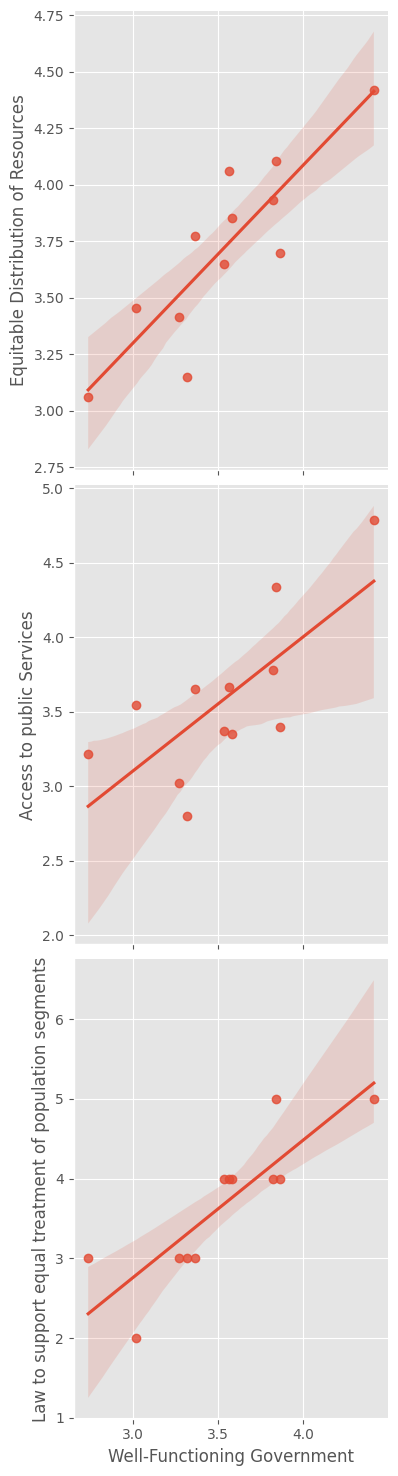

In [27]:
sns.pairplot(happiness_governance_violence, x_vars=['Well-Functioning Government'], y_vars=['Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments'],
             height=5, aspect=.8, kind="reg");

In [146]:
X_capacity=happiness_governance_violence[['Share of youth not in employment, education or training (NEET)','Well-Functioning Government','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy=happiness_governance_violence[['Healthy life expectancy at birth']]
X_capacity= sm.add_constant(X_capacity)

In [147]:
regression_X_capacity_Yhappy = sm.OLS(Yhappy, X_capacity)
X_capacity_Yhappy_res =regression_X_capacity_Yhappy.fit()
X_capacity_Yhappy_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Healthy life expectancy at birth   R-squared:                       0.739
Model:                                          OLS   Adj. R-squared:                  0.521
Method:                               Least Squares   F-statistic:                     3.391
Date:                              Mon, 04 Dec 2023   Prob (F-statistic):             0.0846
Time:                                      18:09:34   Log-Likelihood:                -17.748
No. Observations:                                12   AIC:                             47.50
Df Residuals:                                     6   BIC:                             50.41
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             67.2594      5.395     12.468      0.000      54.059      80.459
Share of youth not in employment, education or training (NEET)     0.3329      0.421      0.791      0.459      -0.697       1.363
Well-Functioning Government                                       -8.9720      2.507     -3.578      0.012     -15.107      -2.837
Equitable Distribution of Resources                                3.8891      3.173      1.226      0.266      -3.876      11.654
Access to public Services                                         -0.6174      1.666     -0.370      0.724      -4.695       3.460
Law to support equal treatment of population segments              2.0546      0.998      2.059      0.085      -0.387       4.496
==============================================================================
Omnibus:                        1.961   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                0.245
Skew:                          -0.158   Prob(JB):                        0.885
Kurtosis:                       3.625   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
X_capacity=happiness_governance_violence[['Well-Functioning Government','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy1=happiness_governance_violence[['Social support']]
X_capacity= sm.add_constant(X_capacity)

In [157]:
regression_X_capacity_Yhappy1 = sm.OLS(Yhappy1, X_capacity)
X_capacity_Yhappy1_res =regression_X_capacity_Yhappy1.fit()
X_capacity_Yhappy1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social support   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2.512
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.136
Time:                        18:12:41   Log-Likelihood:                 16.613
No. Observations:                  12   AIC:                            -23.23
Df Residuals:                       7   BIC:                            -20.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.4479      0.276      1.620      0.149      -0.206       1.102
Well-Functioning Government                              -0.0200      0.131     -0.153      0.883      -0.330       0.290
Equitable Distribution of Resources                       0.0295      0.166      0.178      0.864      -0.363       0.422
Access to public Services                                -0.0804      0.088     -0.915      0.390      -0.288       0.127
Law to support equal treatment of population segments     0.1108      0.053      2.108      0.073      -0.013       0.235
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                1.527
Skew:                          -0.048   Prob(JB):                        0.466
Kurtosis:                       1.255   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
X_capacity=happiness_governance_violence[['Well-Functioning Government','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy2=happiness_governance_violence[['Generosity']]
X_capacity= sm.add_constant(X_capacity)

In [151]:
regression_X_capacity_Yhappy2 = sm.OLS(Yhappy2, X_capacity)
X_capacity_Yhappy2_res =regression_X_capacity_Yhappy2.fit()
X_capacity_Yhappy2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                 -0.109
Method:                 Least Squares   F-statistic:                    0.7298
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.599
Time:                        18:10:37   Log-Likelihood:                 11.679
No. Observations:                  12   AIC:                            -13.36
Df Residuals:                       7   BIC:                            -10.93
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.1413      0.417      0.339      0.745      -0.845       1.127
Well-Functioning Government                               0.1828      0.197      0.926      0.385      -0.284       0.650
Equitable Distribution of Resources                      -0.2446      0.251     -0.976      0.362      -0.837       0.348
Access to public Services                                 0.0026      0.132      0.020      0.985      -0.311       0.316
Law to support equal treatment of population segments     0.0533      0.079      0.672      0.523      -0.134       0.241
==============================================================================
Omnibus:                       10.677   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                5.670
Skew:                           1.378   Prob(JB):                       0.0587
Kurtosis:                       4.936   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
X_capacity=happiness_governance_violence[['Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments']]
Yhappy3=happiness_governance_violence[['']]
X_capacity= sm.add_constant(X_capacity)

In [165]:
regression_X_capacity_Yhappy3 = sm.OLS(Yhappy3, X_capacity)
X_capacity_Yhappy3_res =regression_X_capacity_Yhappy3.fit()
X_capacity_Yhappy3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Freedom to make life choices   R-squared:                       0.122
Model:                                      OLS   Adj. R-squared:                 -0.208
Method:                           Least Squares   F-statistic:                    0.3696
Date:                          Mon, 04 Dec 2023   Prob (F-statistic):              0.777
Time:                                  18:17:33   Log-Likelihood:                 16.720
No. Observations:                            12   AIC:                            -25.44
Df Residuals:                                 8   BIC:                            -23.50
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.6659      0.247      2.693      0.027       0.096       1.236
Equitable Distribution of Resources                      -0.0087      0.131     -0.066      0.949      -0.312       0.294
Access to public Services                                 0.0534      0.081      0.661      0.527      -0.133       0.240
Law to support equal treatment of population segments    -0.0336      0.041     -0.821      0.435      -0.128       0.061
==============================================================================
Omnibus:                        1.284   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                0.944
Skew:                           0.446   Prob(JB):                        0.624
Kurtosis:                       1.955   Cond. No.                         83.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

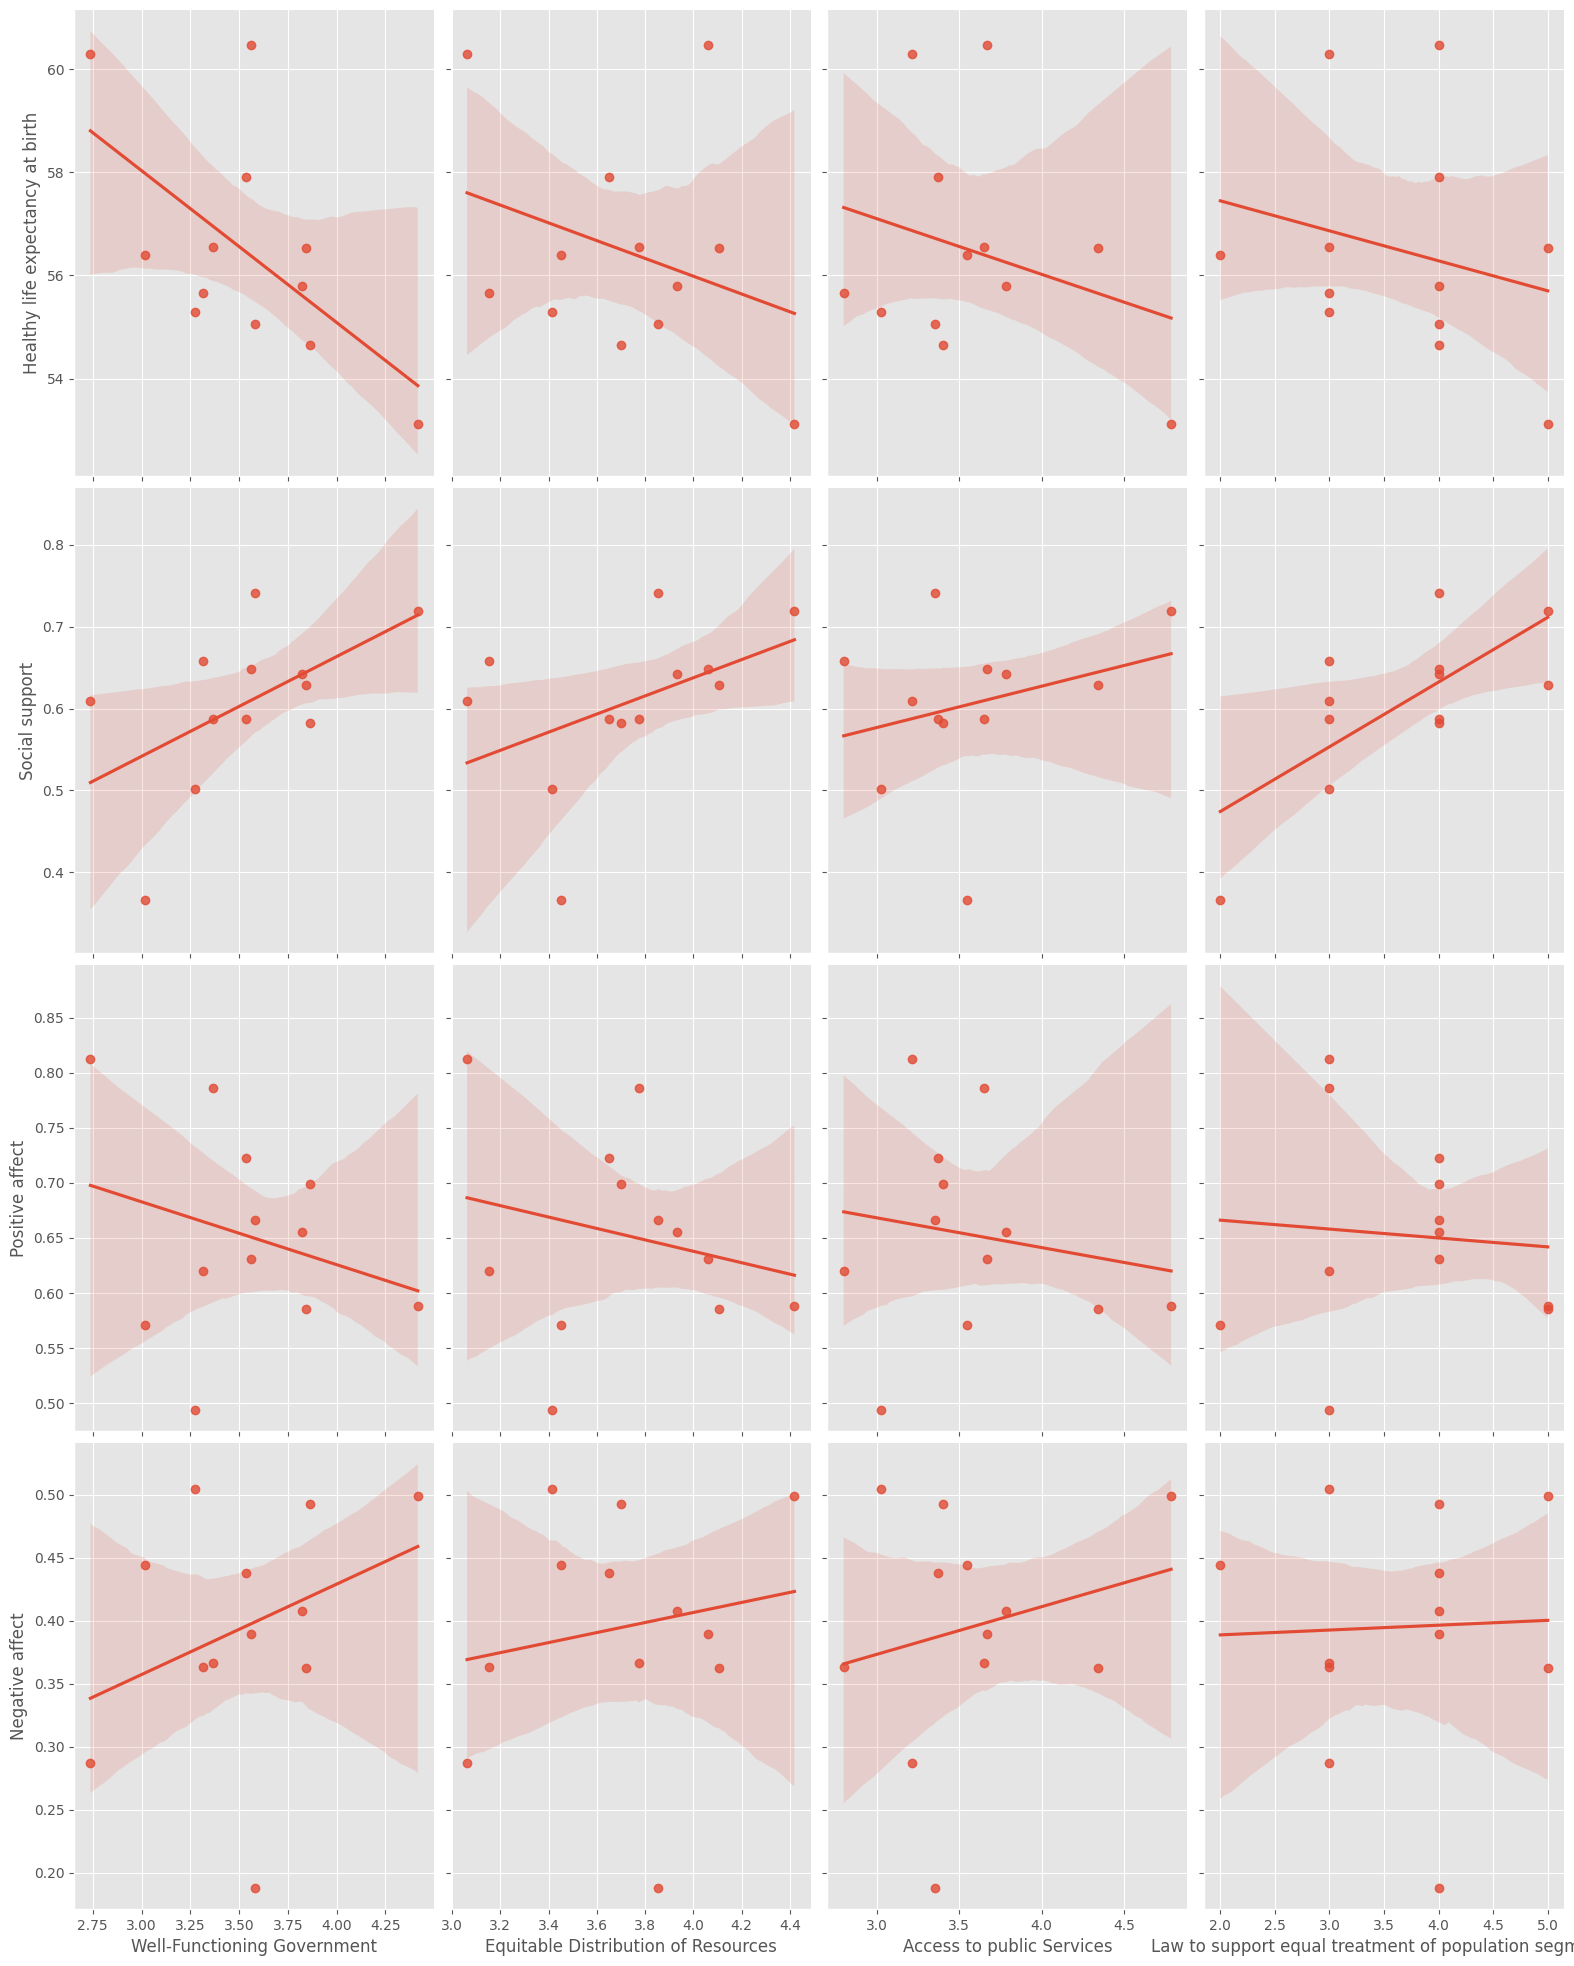

In [37]:
sns.pairplot(happiness_governance_violence, x_vars=['Well-Functioning Government','Equitable Distribution of Resources','Access to public Services','Law to support equal treatment of population segments'], y_vars=['Healthy life expectancy at birth','Generosity',''],
             height=5, aspect=.8, kind="reg");

## Regression for the 2nd research question:

independent variable: people's happiness

dependent variable: political unrest

In [38]:
happiness_governance_violence.dtypes

Country_x                                                           object
year                                                                 int64
Life Ladder                                                        float64
Social support                                                     float64
Healthy life expectancy at birth                                   float64
Freedom to make life choices                                       float64
Generosity                                                         float64
Perceptions of corruption                                          float64
Positive affect                                                    float64
Negative affect                                                    float64
matches                                                             object
full                                                               float64
best_match                                                          object
Country_y                

In [39]:
happiness_governance_violence['Incidents'] = happiness_governance_violence['Incidents'].astype(float)
happiness_governance_violence['Incidents'] = pd.to_numeric(happiness_governance_violence['Incidents'], errors='coerce')

In [40]:
happiness_governance_violence['Fatalities'] = happiness_governance_violence['Fatalities'].astype(float)
happiness_governance_violence['Fatalities'] = pd.to_numeric(happiness_governance_violence['Fatalities'], errors='coerce')

In [182]:
X_happiness=happiness_governance_violence[['Generosity','Healthy life expectancy at birth','Share of youth not in employment, education or training (NEET)','Equitable Distribution of Resources','Law to support equal treatment of population segments']]
Yviolence=happiness_governance_violence[['Fatalities']]
X_happiness= sm.add_constant(X_happiness)

In [183]:
regression_X_happiness_Yviolence = sm.OLS(Yviolence, X_happiness)
X_happiness_Yviolence_res =regression_X_happiness_Yviolence.fit()
X_happiness_Yviolence_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Fatalities   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     2.395
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.159
Time:                        18:37:36   Log-Likelihood:                -81.625
No. Observations:                  12   AIC:                             175.2
Df Residuals:                       6   BIC:                             178.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                           9304.8399   3350.826      2.777      0.032    1105.664    1.75e+04
Generosity                                                     -2945.0897   1054.175     -2.794      0.031   -5524.562    -365.617
Healthy life expectancy at birth                                -128.9240     50.759     -2.540      0.044    -253.126      -4.722
Share of youth not in employment, education or training (NEET)   243.0149    100.004      2.430      0.051      -1.687     487.717
Equitable Distribution of Resources                            -1007.4588    434.515     -2.319      0.060   -2070.679      55.762
Law to support equal treatment of population segments            381.4163    198.604      1.920      0.103    -104.549     867.382
==============================================================================
Omnibus:                        1.273   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                0.761
Skew:                           0.585   Prob(JB):                        0.684
Kurtosis:                       2.608   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
happiness_governance_violence[['Injuries','Negative affect','Access to public Services','Positive affect','Freedom to make life choices','Social support']].corr().round(2)

,Injuries,Negative affect,Access to public Services,Positive affect,Freedom to make life choices,Social support
Injuries,1.00,-0.24,-0.22,-0.04,0.22,0.34
Negative affect,-0.24,1.00,0.22,-0.44,-0.25,-0.44
Access to public Services,-0.22,0.22,1.00,-0.16,0.08,0.28
Positive affect,-0.04,-0.44,-0.16,1.00,0.42,0.22
Freedom to make life choices,0.22,-0.25,0.08,0.42,1.00,-0.01
Social support,0.34,-0.44,0.28,0.22,-0.01,1.00


In [ ]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()
#after merging all the 4 datasets I plot it again!

In [ ]:
sns.regplot(x=turnout_unemployment['Unemployment rate'], y=turnout_unemployment['Preliminary Turnout Rate']);
#after merging all the 4 datasets I will do another multiple regression plot

In [ ]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)


#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

#2nd Project:

Exploring interaction between poverty, food insecurity, unemployment, and voter turnout in 2022

##Research question: how does socioeconomic disadvantage affect voter turnout in general election in 2022?

### According to Maslow (1943, 1954), human needs were arranged in a hierarchy, with survival needs at the bottom, and needs to pursue development and self-achievement at the higher level.

People are motivatied to pursue the needs at the higher level only if the needs for survival are met.

Socioeconomic disadvantage like food insecurity concerns the basic needs for survival. Voting for ideal candidates concerns the need for political participation, which helps to fulfil the high-level need to pursue development and social support.

**My assumption: the struggle to fulfill basic needs can unmotivate voters from voting, to some extent**

##Selected datasets:

Poverty rates by state 2022:https://www.statista.com/statistics/233093/us-poverty-rate-by-state/
Unemployment rates by state 2022:https://www.statista.com/statistics/223675/state-unemployment-rate-in-the-us/
Food insecurity rates by state 2022: https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/
Voter turnout rate by state 2022: https://www.electproject.org/election-data/voter-turnout-data


##Independent variables: Poverty rates, Food insecurity rates, and Unemployment rates by state

In [ ]:
poverty=pd.read_excel("https://github.com/shimjide123/datman/raw/main/us-poverty-rate-2022-by-state.xlsx")

In [ ]:
poverty.head()

,State,Poverty rate
0,United States,11.5
1,New Mexico,18.2
2,Mississippi,17.8
3,Louisiana,16.9
4,Arkansas,15.9


In [ ]:
food=pd.read_excel("https://github.com/shimjide123/datman/raw/main/mapdata2022.xlsx")

In [ ]:
food.head()

,State,Food insecurity rate,Very low food security rate
0,U.S.,11.2,4.3
1,AK,9.5,4.2
2,AL,12.4,4.7
3,AR,16.6,6.5
4,AZ,10.2,4.0


In [ ]:
unemployment=pd.read_excel("https://github.com/shimjide123/datman/raw/main/statistic_id223675_us-annual-unemployment-rate-2022-by-state.xlsx")

In [ ]:
unemployment.head()

,State,Unemployment rate
0,Nevada,5.4
1,District of Columbia,4.7
2,Illinois,4.6
3,Delaware,4.5
4,Pennsylvania,4.4


## Dependent variable: voter turnout 2022

In [ ]:
Turnout=pd.read_excel("https://github.com/shimjide123/datman/raw/main/2022%20November%20General%20Election(1).xlsx")

In [ ]:
Turnout.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.
1,Alabama*,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR


##merge

Here I merge datasets of unemployment rate and voter turnout just as an example, later I will merge all 4 datasets

In [ ]:
Turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [ ]:
Turnout_unemployment['_merge'].value_counts()

both          39
left_only     13
right_only    12
Name: _merge, dtype: int64

In [ ]:
Turnout_unemployment.query("_merge=='left_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874.0,0.461620,242690810.0,261673203.0,1157707.0,1145315.13,340972.0,2643994.13,U.S.,NaN,left_only
1,Alabama*,1424087.0,0.372797,3820009.0,3977770.0,25328.0,32710.83,8245.0,66283.83,AL,NaN,left_only
13,Idaho*,595350.0,0.425940,1397732.0,1490206.0,7996.0,18918.42,5967.0,32881.42,ID,NaN,left_only
17,Kansas*,1008998.0,0.475663,2121246.0,2251251.0,8477.0,10953.06,5428.0,24858.06,KS,NaN,left_only
25,Mississippi*,709100.0,0.324705,2183828.0,2263618.0,17569.0,20026.56,10510.0,48105.56,MS,NaN,left_only
26,Missouri*,2304250.0,0.496337,4642509.0,4822855.0,22890.0,26736.81,20729.0,70355.81,MO,NaN,left_only
37,Oklahoma*,1153284.0,0.395864,2913333.0,3080502.0,22071.0,15888.63,2237.0,40196.63,OK,NaN,left_only
39,Pennsylvania*,5410022.0,0.543539,9953327.0,10366708.0,38938.0,0.00,0.0,38938.00,PA,NaN,left_only
40,Rhode Island*,361449.0,0.436272,828495.0,890835.0,2227.0,0.00,0.0,2227.00,RI,NaN,left_only
42,South Dakota*,354670.0,0.530641,668380.0,695896.0,3176.0,5209.50,3673.0,12058.50,SD,NaN,left_only


In [ ]:
Turnout_unemployment.query("_merge=='right_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
52,Pennsylvania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,right_only
53,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
54,Mississippi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
55,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,right_only
56,Rhode Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,right_only
57,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,right_only
58,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,right_only
59,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
60,Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
61,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,right_only


In [ ]:
Turnout.loc[Turnout['State']=='Alabama*','State']='Alabama'
Turnout.loc[Turnout['State']=='Missouri*','State']='Missouri'
Turnout.loc[Turnout['State']=='Idaho*','State']='Idaho'
Turnout.loc[Turnout['State']=='Kansas*','State']='Kansas'
Turnout.loc[Turnout['State']=='Mississippi*','State']='Mississippi'
Turnout.loc[Turnout['State']=='Oklahoma*','State']='Oklahoma'
Turnout.loc[Turnout['State']=='Pennsylvania*','State']='Pennsylvania'
Turnout.loc[Turnout['State']=='Rhode Island*','State']='Rhode Island'
Turnout.loc[Turnout['State']=='South Dakota*','State']='South Dakota'
Turnout.loc[Turnout['State']=='Tennessee*','State']='Tennessee'
Turnout.loc[Turnout['State']=='Texas*','State']='Texas'
Turnout.loc[Turnout['State']=='Wisconsin*','State']='Wisconsin'

 #at the later stage I will do all of the replace on condition

In [ ]:
turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [ ]:
turnout_unemployment['_merge'].value_counts() #only the voter turnout dataset shows an average figure in the US, thats why it does not merge

both          51
left_only      1
right_only     0
Name: _merge, dtype: int64

In [ ]:
turnout_unemployment.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,NaN,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,2.6,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,4.0,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,3.8,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,3.3,both


##Plotting and regression

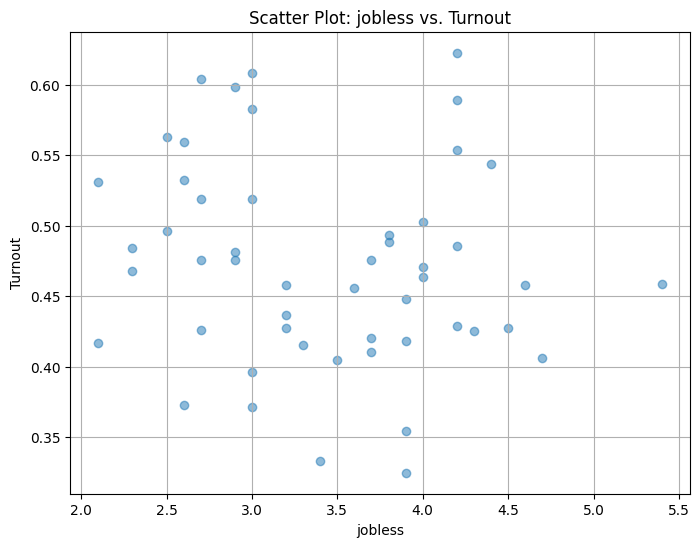

In [ ]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()
#after merging all the 4 datasets I plot it again!

In [ ]:
import seaborn as sns

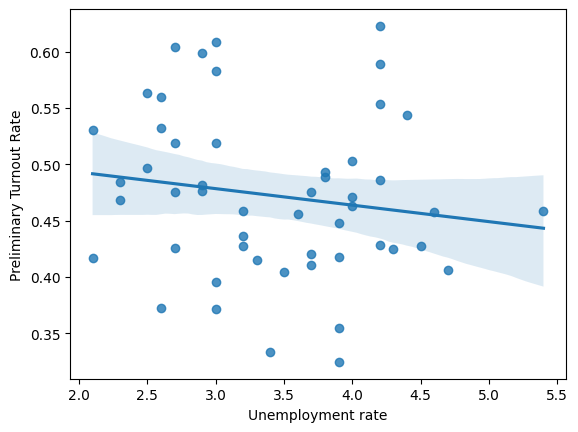

In [ ]:
sns.regplot(x=turnout_unemployment['Unemployment rate'], y=turnout_unemployment['Preliminary Turnout Rate']);
#after merging all the 4 datasets I will do another multiple regression plot

In [ ]:
#this is the multiple regression code I aim to use for the next, I will adjust it for the datasets I used later
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)


#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
